<a href="https://colab.research.google.com/github/Hritik-Ubale/LetsGrowMore_VirtualInternshipProgram/blob/main/Task2_StockMarketPredictionAndForecastingUsingStackedLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

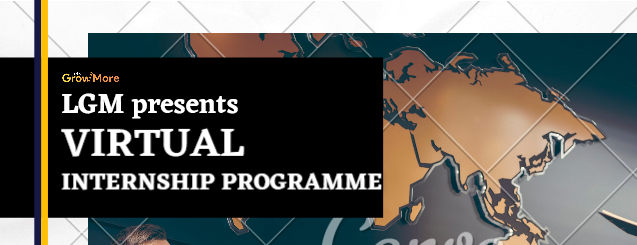

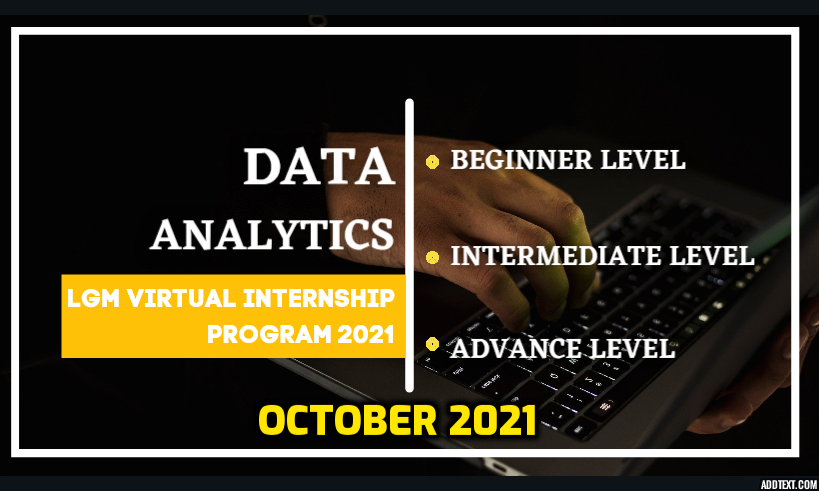

# **INTERN / AUTHOR : HRITIK JITENDRA UBALE**

# **TASK 2**

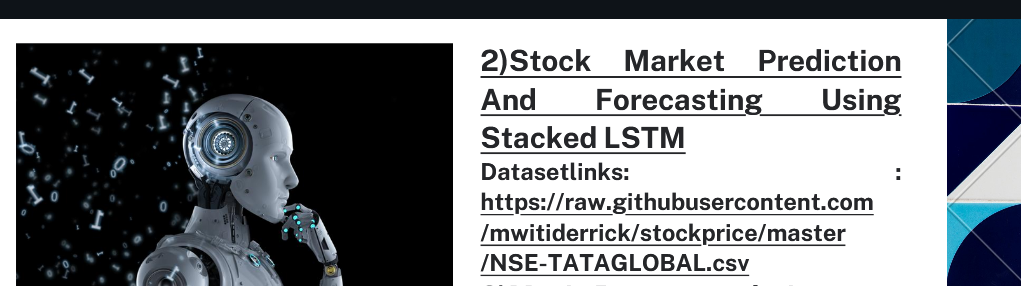

# **The goal here is to Predict and Forecast the Stock market using Stacked LSTM.**

## **Load the Dataset.**

In [ ]:
import pandas as pd
df = pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## **Plot the Close value graph.**

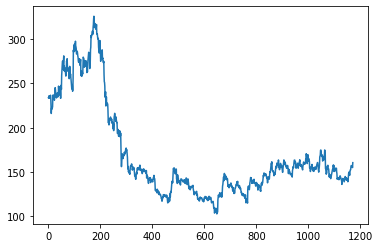

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_close = df['Close']
plt.plot(df_close)

# **Scale the Close Data values.**
Because LSTM is very sensitive to the scale of the data.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close

array([[0.58762887],
       [0.58538772],
       [0.58987001],
       ...,
       [0.24069924],
       [0.23442403],
       [0.25930076]])

# **Split the data into Training and Testing.** we have used 70% data for training and rest for testing.

In [ ]:
training_size=int(len(df_close)*0.7)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

# **Data Preprocessing.**

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# **LSTM**
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. 
LSTM has three gates:
*   **The input gate**: The input gate adds information to the cell state,
*   **The forget gate**: It removes the information that is no longer required by the model,
*   **The output gate**: Output Gate at LSTM selects the information to be shown as output.






In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## **Import required modules for the stacked LSTM.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0018 - val_loss: 8.9772e-04
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0017 - val_loss: 9.7587e-04
Epoch 3/100
12/12 [==============================] - 3s 210ms/step - loss: 0.0016 - val_loss: 8.5220e-04
Epoch 4/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0015 - val_loss: 7.5336e-04
Epoch 5/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0015 - val_loss: 7.6102e-04
Epoch 6/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0015 - val_loss: 7.8794e-04
Epoch 7/100
12/12 [==============================] - 3s 210ms/step - loss: 0.0014 - val_loss: 7.3464e-04
Epoch 8/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0014 - val_loss: 7.0317e-04
Epoch 9/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0013 - val_loss: 8.1026e-04
Epoch 10/100
12/12 [==============================] - 3

# **Prediction.**

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

175.03707394969476

## **Plotting for visualization.**

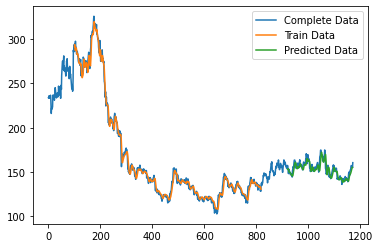

In [ ]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close), label = 'Complete Data')
plt.plot(trainPredictPlot, label = 'Train Data')
plt.plot(testPredictPlot, label = 'Predicted Data')
plt.legend()
plt.show()

# **To predict Market of the Next Week.**

In [ ]:
len(test_data), X_test.shape

(352, (251, 100, 1))

In [ ]:
x_input = test_data[252:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 7
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.23453884]
101
1 day input [0.24092335 0.24114747 0.24607799 0.2371134  0.22613178 0.22770058
 0.21537427 0.18870462 0.18623935 0.20013447 0.1961004  0.18780816
 0.18982519 0.17839534 0.18803227 0.19027342 0.19744509 0.20484088
 0.2097714  0.21806365 0.22501121 0.22545944 0.23957866 0.24742268
 0.23980278 0.24562976 0.21447781 0.22590766 0.22456298 0.22613178
 0.23195876 0.21873599 0.22209771 0.21918422 0.2279247  0.23128642
 0.21246078 0.20327208 0.17548185 0.17974003 0.18041237 0.18018826
 0.18377409 0.18265352 0.17368893 0.1732407  0.18153294 0.17951591
 0.17884357 0.19273868 0.19049753 0.18444644 0.18220529 0.17884357
 0.17144778 0.16920663 0.14926042 0.16606903 0.16651726 0.17279247
 0.17951591 0.17637831 0.17234424 0.16898252 0.16831017 0.16248319
 0.16987898 0.17525773 0.18556701 0.18915285 0.18354998 0.1824294
 0.17256835 0.18108472 0.18153294 0.17055132 0.17189601 0.16943075
 0.17705065 0.16270731 0.17346481 0.18646347 0.20416853 0.21156432
 0.20259973 0.20461676 0.19520394 

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,108)

In [ ]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [ ]:
len(df_close)

1172

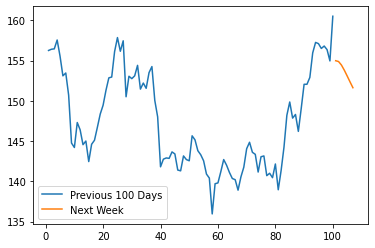

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1072:]), label='Previous 100 Days')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Next Week')
plt.legend()

# **Hence we have predicted the stock price for Next Week.**

![picture](https://image.shutterstock.com/image-vector/thank-you-hand-drawn-lettering-260nw-780491263.jpg)